# Linear regression to study house prices in Salt Lake City. 

## Your Data
Fill out the following information: 

*First Name:* Luis <br>
*Last Name:* Garcia <br>
*E-mail:* luis.garcia@utah.edu <br>
*UID:*  1269715


## Regression of real estate data
For this problem, I analyzed SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in 2015-16 in zip code 84103 ([SLC avenues neighborhood](https://www.google.com/maps/place/Salt+Lake+City,+UT+84103/@40.8030372,-111.8957957,12z/data=!3m1!4b1!4m5!3m4!1s0x87525f672006dded:0x311e638d9a1a2de5!8m2!3d40.810506!4d-111.8449346)). We are primarily interested in regressing the `SoldPrice` on the house attributes (`property size`, `house size`, `number of bedrooms`, etc...). 


### Task 1: Import the data 
I used the [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to import the dataset. The data is contained in two files located in the same directory as this notebook: [`train1.csv`](train1.csv) and [`train2.csv`](train2.csv). After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression. 

In [46]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
from pandas.plotting import scatter_matrix
from ipyleaflet import Map, basemaps
import geopandas as gdp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopandas import GeoDataFrame
#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
import gmaps
from shapely.geometry import Point

import folium
from folium import plugins

In [3]:

train1 = pd.read_csv('train1.csv')
train2 = pd.read_csv('train2.csv')

In [4]:
train_ds = pd.concat([train1,train2], axis = 0)

In [5]:
# official variable of combined datafames
train_ds

,ListNo,Access,AdditInfo,Acres,ListAgt,AirType,Amenities,Area,BackDim,Basemnt,...,WinEvp1,WinEvp2,WinEvp3,WinEvp4,Window,WithDrDt,YearBlt,Zip,Zoning,LastMod
0,1397571,Concrete,NaN,0.29,Liz Slager,Central Air; Electric,See Remarks; Cable Tv Available; Cable Tv Wire...,101,0.0,Daylight; Entrance; Full; Walkout,...,0,0,0,0,Blinds,00/00/0000,1998,84103,NaN,08/29/2016
1,1394021,Asphalt,NaN,0.01,Angela Carlson,Central Air; Electric,Cable Tv Available; Electric Dryer Hookup,101,0.0,None/Crawl Space,...,0,0,0,0,Blinds; Plantation Shutters,00/00/0000,1965,84103,RES,08/22/2016
2,1393604,NaN,NaN,0.11,Rachel Kitterer,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup,101,0.0,Full,...,0,0,0,0,Blinds; Plantation Shutters,00/00/0000,1940,84103,NaN,08/29/2016
3,1393602,Concrete,NaN,0.14,Rachel Kitterer,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup,101,0.0,Full,...,0,0,0,0,Blinds,00/00/0000,1940,84103,NaN,08/29/2016
4,1393829,Asphalt,NaN,0.01,T. Carter Maudsley,Central Air; Electric,Cable Tv Wired,101,0.0,None/Crawl Space,...,0,0,0,0,NaN,00/00/0000,1969,84103,NaN,08/18/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1277128,Concrete,NaN,0.28,Liz Slager,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup; Exercis...,101,0.0,Partial; Walkout,...,0,0,0,0,Blinds; Full,00/00/0000,1978,84103,RES,10/06/2015
144,1265274,Concrete,NaN,0.01,PATRICK WISCOMBE,Central Air; Electric,Electric Dryer Hookup; Exercise Room; Gas Drye...,101,0.0,None/Crawl Space,...,0,0,0,0,Full; Shades,00/00/0000,1979,84103,NaN,05/24/2016
145,1241781,Concrete,NaN,0.00,Jacqui Johnston,Central Air; Electric,Exercise Room; Swimming Pool,101,0.0,None/Crawl Space,...,0,0,0,0,Draperies,00/00/0000,1976,84103,CONDO,10/29/2015
146,1238399,NaN,NaN,0.07,Grady Kohler,Central Air; Electric,Cable Tv Available; Electric Dryer Hookup,101,0.0,None/Crawl Space,...,0,0,0,0,NaN,00/00/0000,1886,84103,NaN,09/11/2015


### Task 2: Clean the data 

1. There are 206 different variables associated with each of the 348 houses in this dataset. I Skimmed through them and got an understanding of the dataset. <b> Source </b>: (http://www.utahrealestate.com/)

+ Filtered the dataset to only keep houses with List Price between 200,000 and 1,000,000 dollars. This is an arbitrary choice and realizde that some people are high rollers, but for our purposes I considered the others as outliers. 

+  
The following variables used for prediction: 
`['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']` 

+ Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use [`str.replace()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values as in Lecture. In particular, convert 'TotSqf' to an integer and add a column titled `Prop_Type_num` that is 
$$
\text{Prop_Type_num}_i = \begin{cases} 
0 & \text{if $i$-th listing is a condo or townhouse} \\
1 & \text{if $i$-th listing is a single family house}
\end{cases}. 
$$
+ Removed the listings with erroneous `Longitude` (one has Longitude = 0) and `Taxes` values (two have unreasonably large values).

In [6]:

# 2)
research_prRange = train_ds[(train_ds['LstPrice']> 200000 ) & (train_ds['LstPrice'] < 1000000)]

# 3) New dataset for wanted columns
homes_ds = research_prRange[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']].copy()

#4 1)Convert 'TotSqf' to an integer and add a column titled Prop_Type_num that is
homes_ds['TotSqf'] = homes_ds['TotSqf'].astype(str).str.replace(',', '').astype(int)

# 4.2) 
conditions = [
    (homes_ds['PropType']=='Single Family'),
    (homes_ds['PropType'] == 'Condo') | (homes_ds['PropType']== 'Townhouse')]
choices = [1,0]

homes_ds['Prop_Type_Num'] = np.select(conditions, choices, default='null')

#5)

# Created a variable for rows under the 2 largest tax values
homes_ds = homes_ds.sort_values("Taxes", ascending = False)[2:] 
# Created variable for rows that do not have a 0 for longitude
homes_ds = homes_ds[homes_ds['Longitude'] != 0] # longtitdeu with 0


In [7]:
homes_ds

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,Prop_Type_Num
155,0.17,0,3,40.769468,-111.849659,949000,1,0,Single Family,920000,9205,4.0,5.0,4403,1922,1
161,0.69,1,3,40.790110,-111.892745,988000,1,0,Single Family,980000,8680,5.0,4.0,4037,1996,1
122,0.45,1,3,40.787674,-111.885861,995000,1,6,Single Family,865000,8025,5.0,7.0,7508,1995,1
106,0.59,2,3,40.781987,-111.860854,850000,0,0,Single Family,790000,7481,4.0,4.0,4378,1995,1
61,0.36,3,5,40.775430,-111.843083,849900,0,0,Single Family,800000,7395,8.0,6.0,6447,1978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.10,0,0,40.785404,-111.900512,224900,0,3,Single Family,233700,935,4.0,2.0,1564,1910,1
34,0.04,2,2,40.785648,-111.900301,315000,1,0,Single Family,305000,926,2.0,3.0,1674,2013,1
105,0.01,2,2,40.785648,-111.900301,299000,1,0,Townhouse,300000,906,2.0,3.0,1682,2014,0
103,0.08,0,0,40.785506,-111.898187,224900,0,2,Single Family,220000,612,2.0,1.0,867,1886,1


### Task 3: Exploratory data analysis 

+ Made a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo). 

+ Compute the correlation matrix and use a heat map to visualize the correlation coefficients. 
    - Use a diverging color scale from -1 to +1 (see `vmin` and `vmax` parameters for [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html))
    - Show a legend
    - Make sure the proper labels are visible and readable (see [`xticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html) and the corresponding [`yticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yticks.html).

+ Make a scatter plot matrix to visualize the correlations. Color-code the dots by property type. For the plot, only use a subset of the columns: `['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']`. Determine which columns have strong correlations. 

+ Describing your findings. 


In [8]:
# your code goes here
print('There are ', len(homes_ds.columns),  'variables')
# Describing dataset
homes_ds.describe()


There are  16 variables


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,0.131051,0.750973,1.276265,40.777555,-111.875749,463404.525292,0.832685,1.046693,450866.692607,3024.774319,3.217899,2.529183,2478.875486,1940.490272
std,0.123753,1.246969,0.975051,0.005825,0.013946,197317.157047,3.397957,1.587844,187524.462691,1664.202506,1.221228,1.075347,1212.437753,36.334182
min,0.000000,0.000000,0.000000,40.769424,-111.913645,205000.000000,0.000000,0.000000,205000.000000,1.000000,1.000000,0.000000,844.000000,1852.000000
25%,0.050000,0.000000,0.000000,40.772489,-111.886688,310000.000000,0.000000,0.000000,308000.000000,1877.000000,2.000000,2.000000,1550.000000,1908.000000
50%,0.110000,1.000000,1.000000,40.775852,-111.874094,414500.000000,1.000000,0.000000,400000.000000,2435.000000,3.000000,2.000000,2224.000000,1937.000000
75%,0.160000,1.000000,2.000000,40.782180,-111.866018,589000.000000,1.000000,2.000000,565000.000000,3796.000000,4.000000,3.000000,3017.000000,1976.000000
max,0.690000,16.000000,5.000000,40.791059,-111.843083,999900.000000,54.000000,8.000000,980000.000000,9205.000000,8.000000,7.000000,7508.000000,2015.000000


<b> 1).  Describing dataset </b>:The dataset includes 16 variables ( <b> 2 of which are categorical </b>) with some including interesting information reagrding the housing in Salt Lake City. Firstly, the values correspond well. The columns that are meant to be quantified are in floating types. One thing that stands out is the fact that 1 particular record has 54 patios Which is interesting because that would probably be idenitied as either a condo or townhouse, most likely a condo since they have an apartment structure. 

Text(0.5, 1.0, 'Price listing per house type')

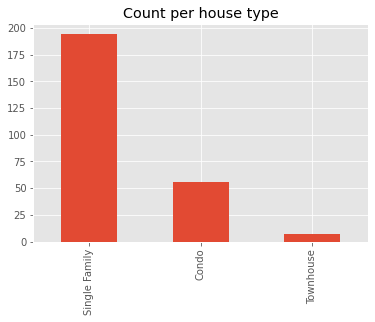

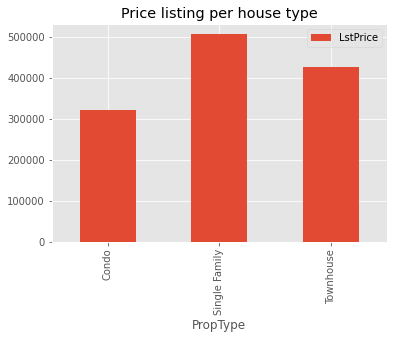

In [11]:

#-------2--------#

# Bar chart of different types of homes
# count per each
homes_ds['PropType'].value_counts().plot(kind = 'bar')
plt.title("Count per house type")

# Comparing Price listing per house type
homes_pt = pd.pivot_table(data= homes_ds,index = 'PropType', values = 'LstPrice')
homes_pt.plot.bar()
plt.title('Price listing per house type')



C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.co

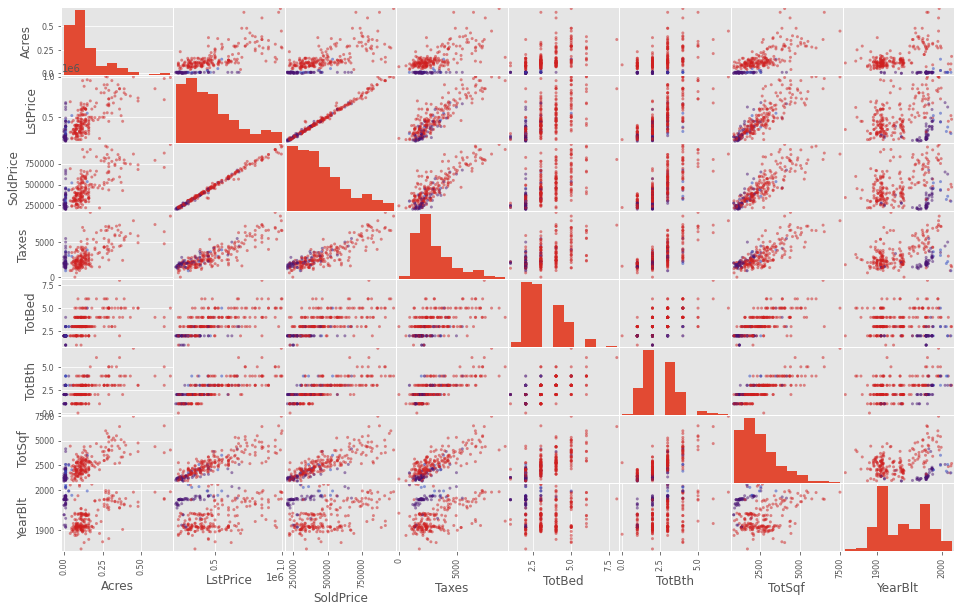

In [15]:
#-------4--------#
#Make a scatter plot matrix to visualize the correlations. Color-code the dots by property type. 
#For the plot, only use a subset of the columns: ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 
#'TotSqf', 'YearBlt']. Determine which columns have strong correlations.

                                                     #Red               #Blue          # Blue-purple-ish
color_list=homes_ds["PropType"].map({"Single Family":"#cf1f1f", "Townhouse":"#2b46c2", "Condo":"#491473"})

scatter_matrix(homes_ds[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth','TotSqf', 'YearBlt']],color = color_list, figsize = (16,10))

print()

**Your Interpretation for 4) and 5):** The data values of the columns seem to make sensr based on their metrics of values. In terms of the dynamics of the relationship between each other are very interesting. Listing price and Sold price seems to have the strongest correlation out of any other parameters. This may mean that the listed price are consistent with the sold price, or at least as similar as possible. Furthermore, the Year Built paramter seems to not have an apparent relationship with any of the variables. Although what one can observe from looking at the Years Built is that most of the data points of townhouses and condos seemed to have been mostly built around the year 2000, which may indincate a substaintial increase of new archectural development.

### Task 4: Geospatial plot
Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of lat and long makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?



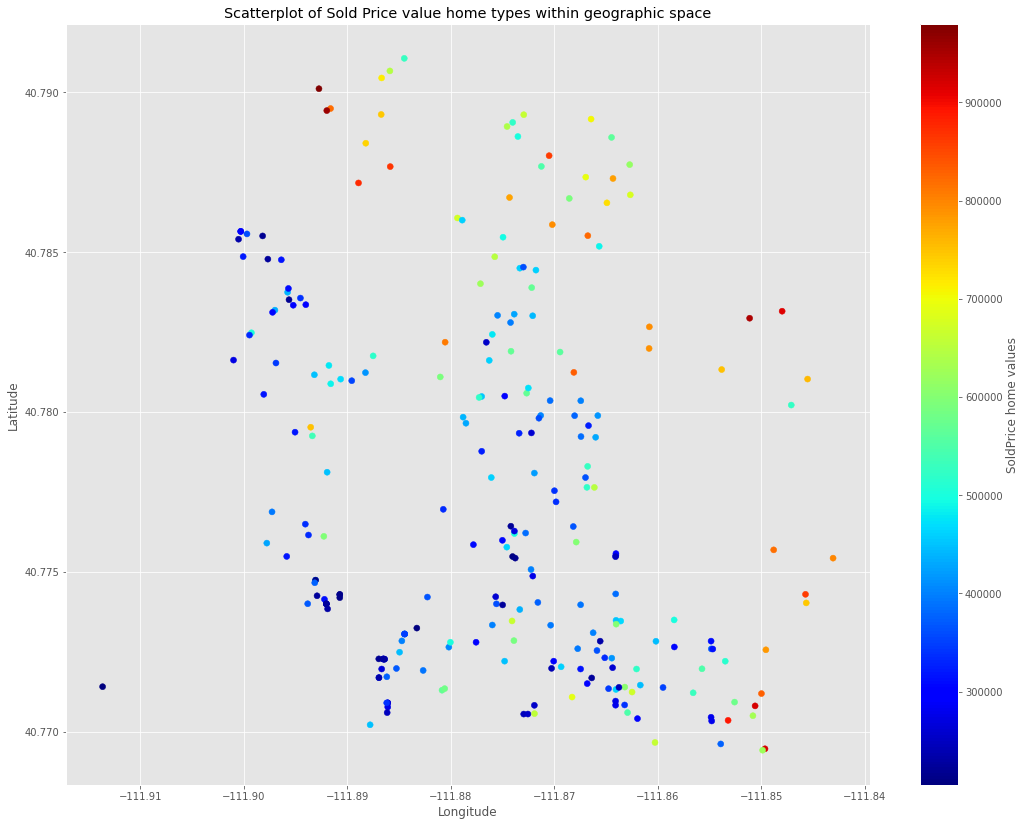

In [107]:


plt.figure(figsize=(18, 14))
plt.scatter(homes_ds["Longitude"], homes_ds["Latitude"], c= homes_ds["SoldPrice"], cmap=plt.get_cmap("jet"))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatterplot of Sold Price value home types within geographic space")
colorb = plt.colorbar()
colorb.set_label("SoldPrice home values")


In [108]:
#converint pandas df to geodf
geometry = [Point(xy) for xy in zip(homes_ds['Longitude'],homes_ds['Latitude'])]
gdf = GeoDataFrame(homes_ds , crs="EPSG:4326",geometry=geometry )


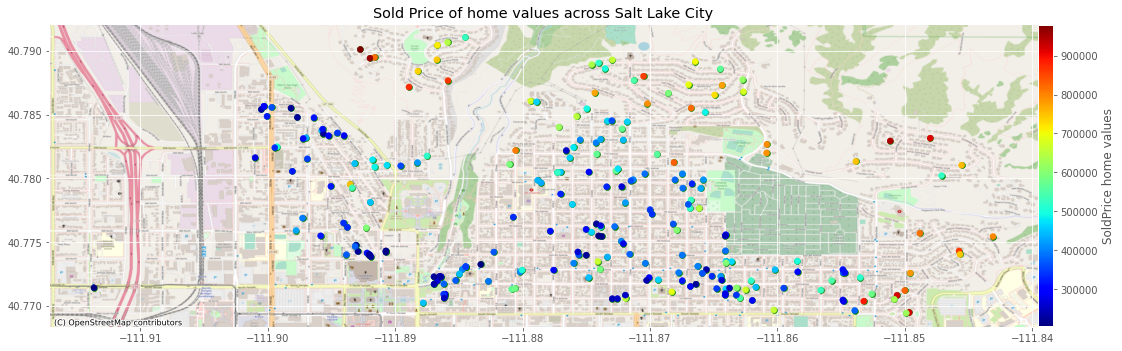

In [115]:
import contextily as cx

ax = gdf.to_crs('EPSG:4326').plot(figsize=(18, 14),color = 'green')


#Add in hospitals as points
plt.scatter(gdf["Longitude"], gdf["Latitude"], c= gdf["SoldPrice"], cmap=plt.get_cmap("jet"))

#Now making a nice legend
colorb = plt.colorbar(fraction=0.015, pad=0.0005)
colorb.set_label("SoldPrice home values")

#Now adding in the basemap imagery
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik, zoom=16)

#Now exporting the map to a PNG file
plt.title('Sold Price of home values across Salt Lake City')
plt.savefig('Residential Income in Salt Lake City.png', dpi=100) #bbox_inches='tight'

<b> Interpretation </b>: From a general observation, it seems likely that prices go up the further east and north one goes. However, the strength of the relationship between the geographical location and the sold price value seem to be more dynamic. It seems like the longitude has more of an influence on sold price than the latitude. 

### Task 5: Simple  Linear Regression 
Use the `ols` function from the [statsmodels](http://www.statsmodels.org/stable/index.html) package to regress the Sold price on some of the other variables. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is one of the other variables. 

You'll find that the best predictor of sold price is the list price. Report the R-squared value for this model (`SoldPrice ~ LstPrice`) and give an interpretation for its meaning. Also give an interpretation of $\beta_1$ for this model. Make a scatterplot of list price vs. sold price and overlay the prediction coming from your regression model. 

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.520e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.30e-257
Time:                        13:43:27   Log-Likelihood:                -2893.0
No. Observations:                 257   AIC:                             5790.
Df Residuals:                     255   BIC:                             5797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.267e+04   2999.326      4.225      0.0

<Figure size 1296x1008 with 0 Axes>

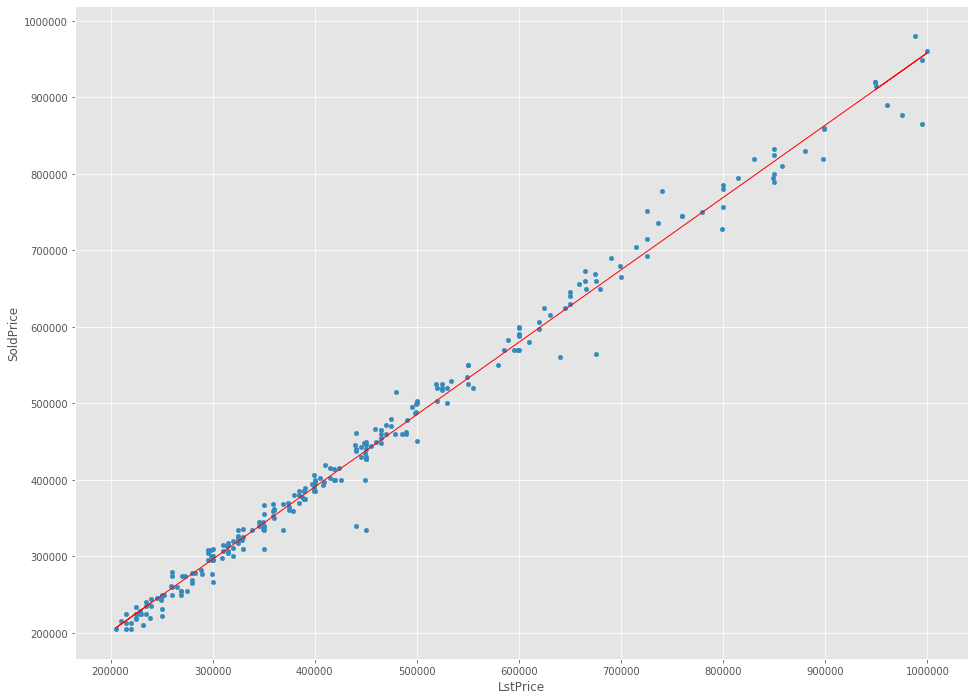

In [49]:
# Your code here

olsH = sm.ols(formula = "SoldPrice ~ LstPrice" ,data = homes_ds).fit()
print(olsH.summary())

plt.figure(figsize=(18, 14))
homes_ds.plot.scatter("LstPrice","SoldPrice", figsize = (16,12))
plt.plot(homes_ds['LstPrice'], olsH.predict(), c= 'r', linewidth = 1)

**Your Interpretation:** Based on running a simple linear regression model of both sold price and listing price, both have a very strong linear relatipnship amongst each other with a R square value of 99%. Furthermore, the p-value was projected as less than 5%, indicating that these results are statistically signifcant, which also indicates that they are dependent of each other. This might ultimately mean that the listed price is not misleading. In terms of model implications, both variables should not be utilized in the same model due to multicollinearity.

### Task 6: Multilinear Regression 
Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Prop_Type. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots +  \beta_n x_n, 
$$
where $x_i$ are predictive variables. Which variables are the best predictors for the Sold Price? 

Specific questions:
1. Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for `TotSqf`.  
+ Estimate the value that each Garage space adds to a house. 
+ Does latitude or longitude have an impact on house price? Explain. 
+ If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

In [124]:
# your code goes here
# 1
ols_mult = sm.ols(formula = "SoldPrice ~ Taxes + TotSqf + Acres + YearBlt + Taxes + TotBth" ,data = homes_ds).fit()

print(ols_mult.summary())

#2
ols_mult_G = sm.ols(formula = "SoldPrice ~ Taxes + TotSqf + Acres + YearBlt + Taxes + + TotBth+ GaragCap" ,data = homes_ds).fit()
print(ols_mult_G.summary())

#3
ols_mult_L = sm.ols(formula = "SoldPrice ~ Taxes + TotSqf + Acres + YearBlt + Taxes+ GaragCap+ TotBth+ Latitude+Longitude" ,data = homes_ds).fit()
print(ols_mult_L.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.09e-94
Time:                        22:11:19   Log-Likelihood:                -3256.9
No. Observations:                 257   AIC:                             6526.
Df Residuals:                     251   BIC:                             6547.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.219e+05   2.85e+05      1.480      0.1

1. Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for `TotSqf`.  
+ Estimate the value that each Garage space adds to a house. 
+ Does latitude or longitude have an impact on house price? Explain. 
+ If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

**Your Interpretation:** 
<br> <b> 1) </b> The coefficient for <b>'TotSqf'</b> from the first model is measured at 58.4112. This indicates that for every square foot increase of the house, approximately on average $58 was added to the sold price value.

<b> 2) </b> For each garage space that is added in the second model, the sold price value average goes up by $29,600.

<b> 3) </b> It seems bothlatitude and longitude has a huge impact on sold price value. However, in terms of the latitude variable, the data is not statistically significant, which means latitude should be taken with precaution even though it has a strong correlation coefficient with the sold price value. In terms of longitude, not only is the data strongly positively correlated with sold price but it is also stastically significant to prove it. 

<b> 4) </b>The model I have created incorporating physical, historical, and geographical contextual paramteres of these houses should be the base to a certain extent in starting a 'House-Flipping' company. By incoporting physical characterstics of the house, the location, and historical information such as the year it was built, are also essential factors playing into the company. However, some of these parameters have to be taken with a grain of salt. For example, acres, years built, longitude, and also total bathrooms are variables that were not statistically significant,  with values over the alpha value of 5%. Investigating those parameters more can influence whether or not to incorporate them in certain situations. 

### Task 7: Incorporating a categorical variable

Above, we considered houses, townhouses, and condos together, but here we'll distinguish between them. Consider the two regression models: 
$$
\text{SoldPrice} = \beta_0 + \beta_1 \text{Prop_Type_num}
$$
and 
$$
\text{SoldPrice} = \beta_0  + \beta_1 \text{Prop_Type_num} + \beta_2 \text{TotSqf}
$$
From the first model, it would appear that Property type is significant in predicting the sold price. On the other hand, the second model indicates that when you take into account total square footage, property type is no longer predictive. Explain this. (Hint: there is a confounder lurking here.) Make a scatterplot of TotSqf vs. SoldPrice where the house types are colored differently to illustrate your explanation. 

In [126]:
# Your code goes here
# part 1 

ols_PropType = sm.ols(formula = "SoldPrice ~ Prop_Type_Num", data = homes_ds).fit()
print(ols_PropType.summary())

ols_PropType_sqf = sm.ols(formula = "SoldPrice ~ Prop_Type_Num + TotSqf", data = homes_ds).fit()
print(ols_PropType_sqf.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     43.93
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.01e-10
Time:                        22:32:15   Log-Likelihood:                -3464.1
No. Observations:                 257   AIC:                             6932.
Df Residuals:                     255   BIC:                             6939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            3.25e+05   2.19

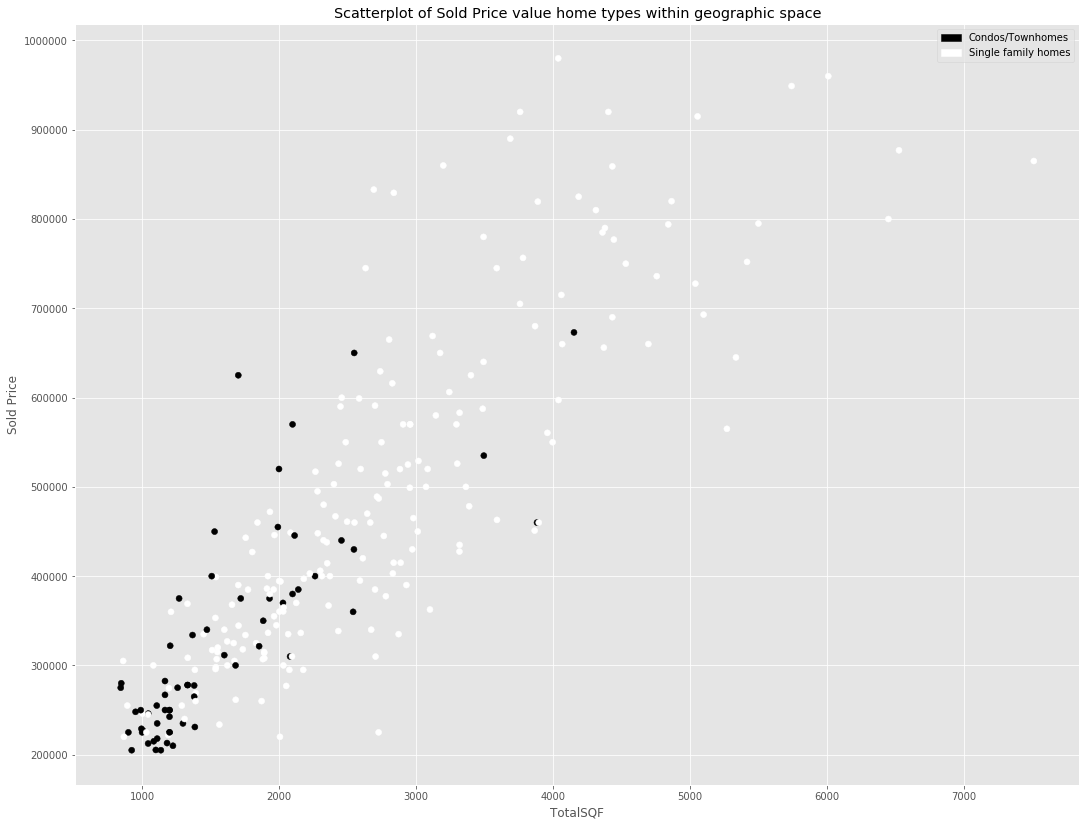

In [70]:
import matplotlib.patches as mpatches

blk_patch = mpatches.Patch(color='black', label='Condos/Townhomes')
white_patch = mpatches.Patch(color = 'white', label = 'Single family homes')

plt.figure(figsize=(18, 14))
scatt = plt.scatter(homes_ds["TotSqf"], homes_ds["SoldPrice"], c= homes_ds["Prop_Type_Num"], cmap=plt.get_cmap("jet"))
plt.xlabel("TotalSQF")
plt.ylabel("Sold Price")
plt.title("Scatterplot of Sold Price value home types within geographic space")
plt.legend(handles = [red_patch, blue_patch])

**Your Interpretation:** Incorpoarting just the property type does not speak much volume into sold price, as it only explains 14% (r-square value) of the data. However, it is still a fair metric to incorporate since it is stastically significant, while having a positive correlation coefficient of $166,800 for ever single family home. Additionally though, when adding total sqaure feet into the model, the independent variables now explain 73.4% of the model. Furthermore, it is statistically signifcant, which gives some validation to that pattern. However, the house property type does not become stastically signicant (p-value of 0.465) anymore which means that total sqaure feet can stand on its own to explain sold price. The scatterplot from above further drives that point. Total sqaure feet and sold price coincide a lot with each other, with a seemingly linear relationship. The single family house type and condows/townhomes types also seem to follow that linear relationship, with a constrain on the condos/townhomes not going any further than 4,000 square feet and 600,000 on solid price value. 

